# Przetwarzanie sygnałów

## Zadanie 1

#### a) Przeanalizuj poniższy skrypt

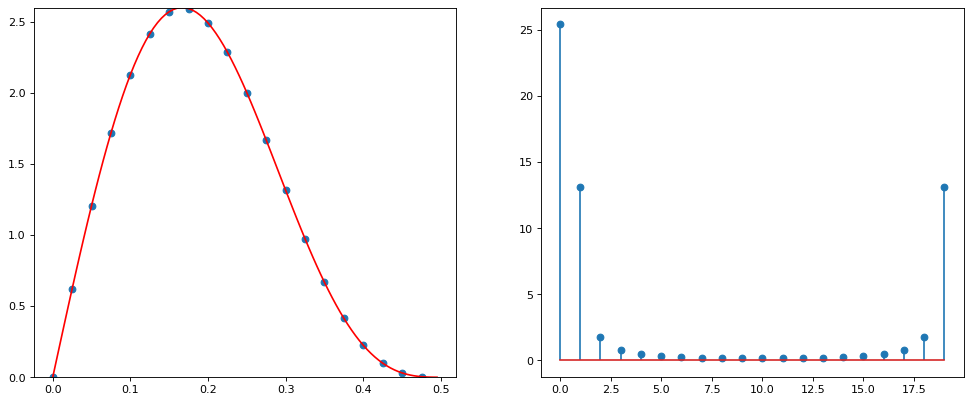

In [42]:
import matplotlib.pyplot as plt
from pylab import *
from numpy import *
import math
from ipywidgets import *

#--- Definiujemy sygnal wejsciowy
A = 1        # Amplituda sygnalu
F = 2.0      # Czestotliwosc sygnalu [Hz]
T = 1/F      # Okres sygnalu [s]
f = lambda t : A * np.sin(2*pi*t*F) + A * 2 * np.sin(2*pi*t)  # Def. analizowanej funkcji (sygnalu)

#--- Probkujemy sygnal
LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
w = 40       # Częstotliwość probkowania [Hz]
TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
n = len(t)                 # Liczba próbek

signal = f(t)   

#--- Rysujemy sygnał (niebieskie kółka)
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, signal, 'o')

#--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
base_t = np.arange(0, LP * T, 1/200)
base_signal = f(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])

#--- Wykonujemy FFT
signal1 = fft.fft(signal)
signal1 = abs(signal1) # moduł

#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
#ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

freqs = range(n)
stem(freqs, signal1, '-*');

**UWAGA**: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [3]:
def draw_signal(A: int = 1, F: float = 2.0, LP: int = 1, w: int = 40):
    # A - amplitude, F - signal frequency, LP - number of cycles, w - sampling frequency [Hz]
    T = 1 / F                               # Cycle [s]
    f = lambda t : A * np.sin(2*pi*t*F)     # Definition of function
    TW = 1/w                                # Sampling time [s]
    t = np.arange(0, LP*T, TW)              # Sampling moments (X-axis)
    n = len(t)                              # Number of samples

    signal = f(t)

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal)
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Frequency [Hz]')
    ymax = max(signal1)
    #ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

    freqs = range(n)
    stem(freqs, signal1, '-*')

    xlabel='Frequency [Hz]'



In [4]:
interact(draw_signal, A=(0, 10, 1), F=(0, 10.0, 0.5), LP=(0, 5, 1), w=(0, 100.0, 0.5))

interactive(children=(IntSlider(value=1, description='A', max=10), FloatSlider(value=2.0, description='F', max…

<function __main__.draw_signal(A: int = 1, F: float = 2.0, LP: int = 1, w: int = 40)>

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [5]:
def prosta(a=2, b=0):
    x = np.linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)

interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

#### b) Zmień częstotliwość próbkowania na 50Hz.

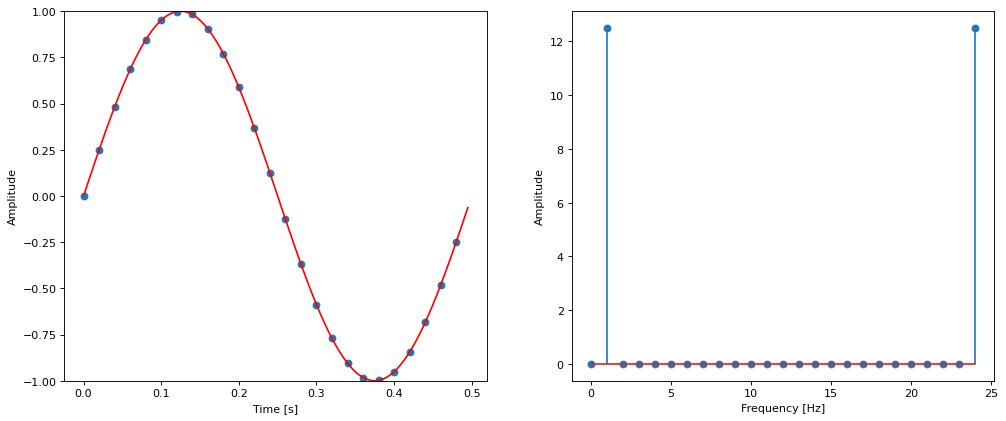

In [6]:
draw_signal(w=50)

#### c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

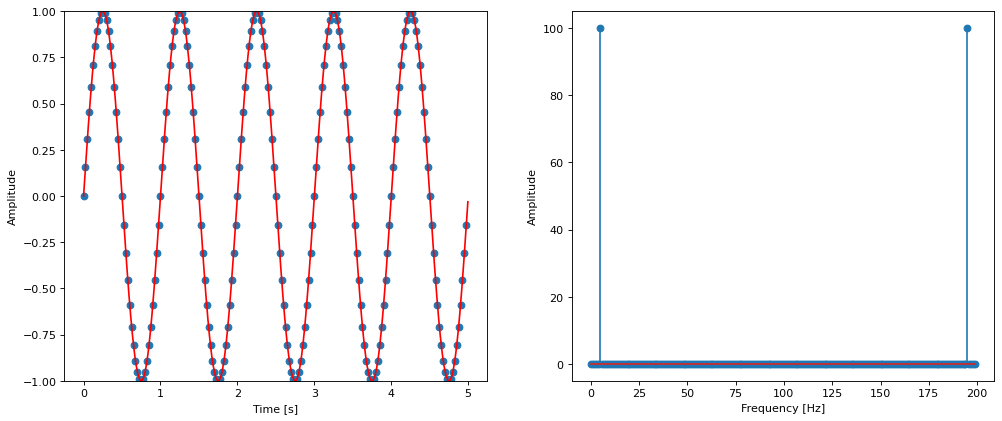

In [7]:
draw_signal(F=1.0, LP=5)

#### d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

#### e) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. <font color='red'>Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy</font>? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. <font color='red'>Dlaczego uzyskano taki wynik</font>?

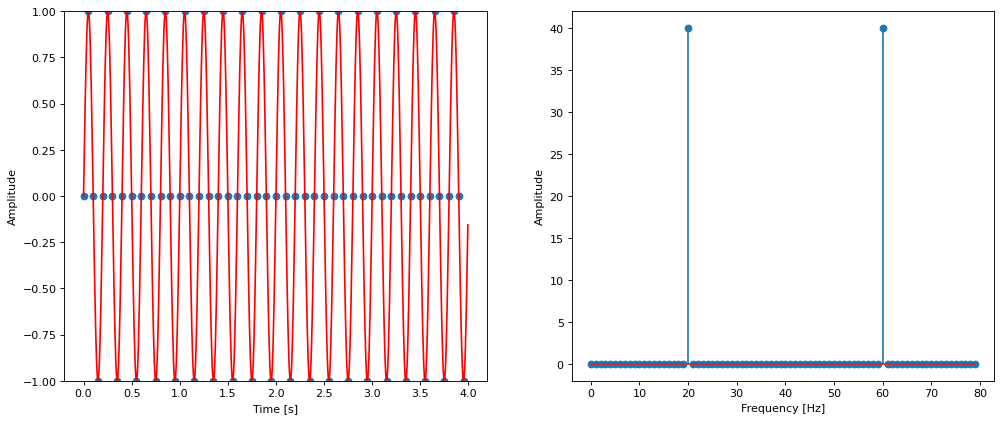

In [8]:
draw_signal(F=5.0, LP=20, w=20)

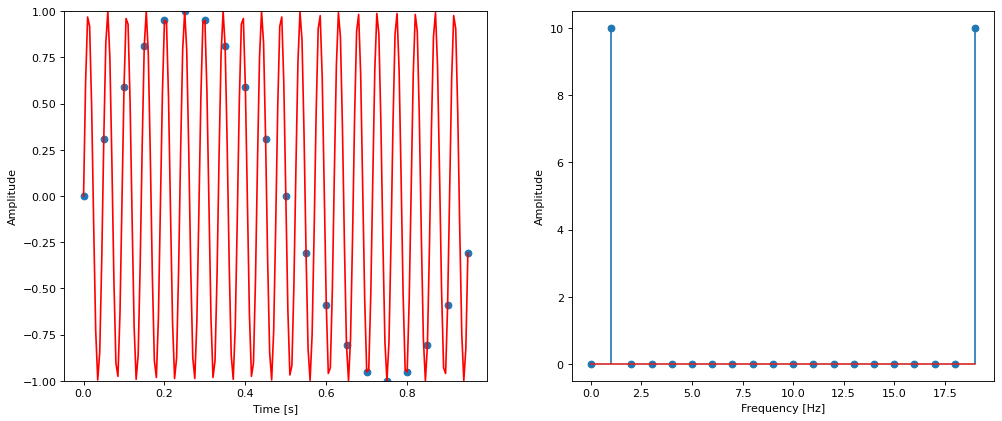

In [9]:
draw_signal(F=21.0, LP=20, w=20)

#### f) Porównaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. <font color='red'>Jak zmienia się wartość na osi OY na wykresie spektrum</font>?

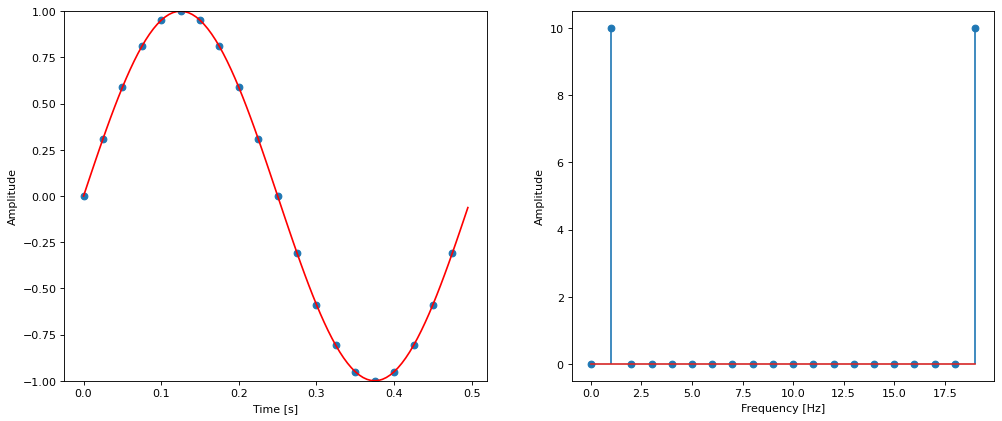

In [10]:
draw_signal(A=1)


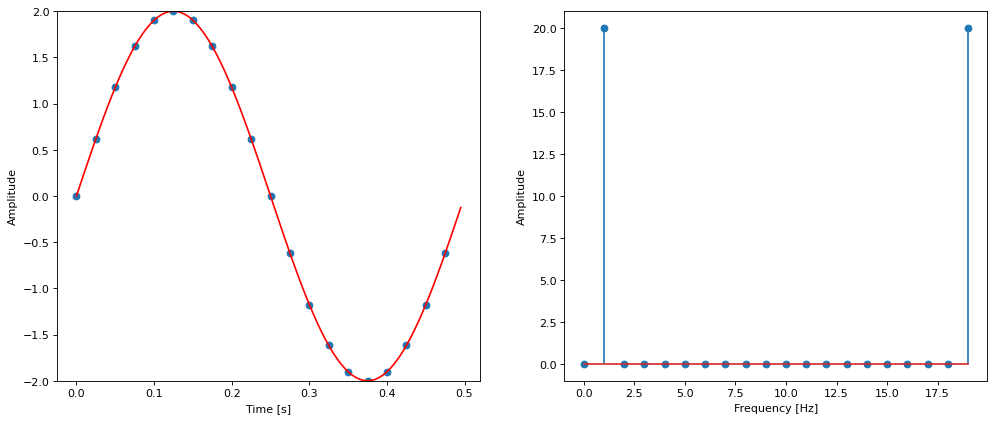

In [11]:
draw_signal(A=2)


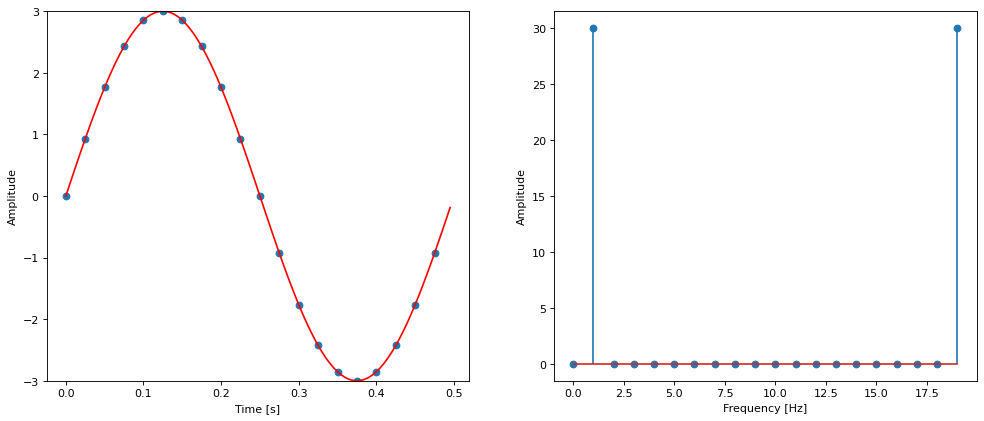

In [12]:
draw_signal(A=3)
# wartość osi Y mnoży się przez podaną amplitudę A

#### g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, $T=1s$? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(F*2\pi t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

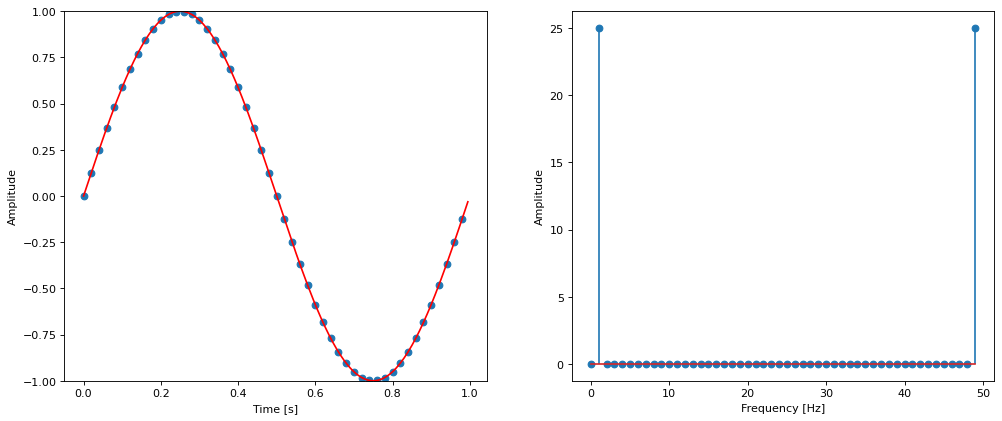

In [13]:
draw_signal(F=1, w=50)
# 50

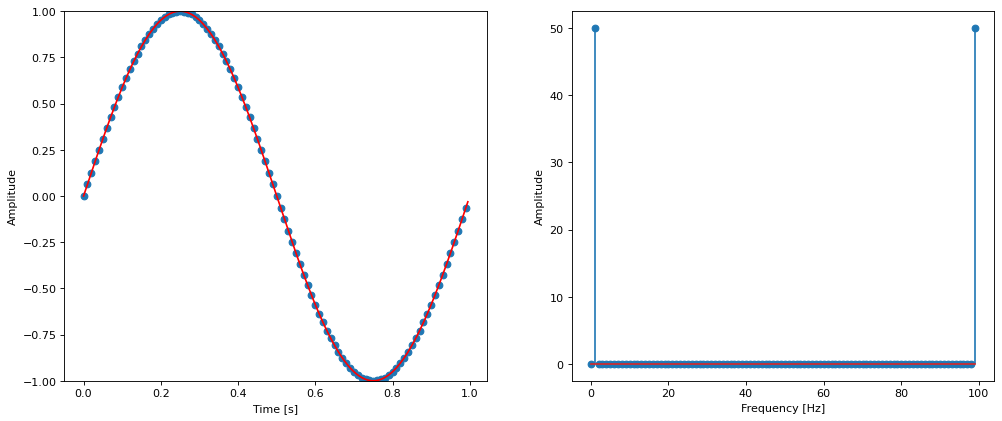

In [14]:
draw_signal(F=1, w=100)


#### h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji (tu fajnie użyć interact), częstotliwości próbkowania oraz rozważanych liczb punktów. Pamiętaj o wysokim LP.

In [15]:
interact(draw_signal, A=(3, 10, 1), F=(3, 10.0, 0.5), LP=(5, 5, 1), w=(3, 100.0, 0.5))


interactive(children=(IntSlider(value=1, description='A', max=10), FloatSlider(value=2.0, description='F', max…

<function __main__.draw_signal(A: int = 1, F: float = 2.0, LP: int = 1, w: int = 40)>

## Zadanie 2

#### Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Pamiętaj aby przeskalować oś OX na wykresie spektrum. Możesz przyjąć jako rozpatrywany okres rok, wówczas częstotliwość próbkowania będzie wynosiła 12.

In [22]:
file = '../data/lab3_data/lab_3a/spots.txt'
with open(file, 'r') as f:
    data = f.readlines()

data_arr = np.genfromtxt(data, dtype=float)
print(data_arr)
print(len(data_arr))

[24.1 25.1 26.6 ... 76.3 36.4 31.4]
2542


C:\Users\miko2\anaconda3\envs\KCK\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\miko2\anaconda3\envs\KCK\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


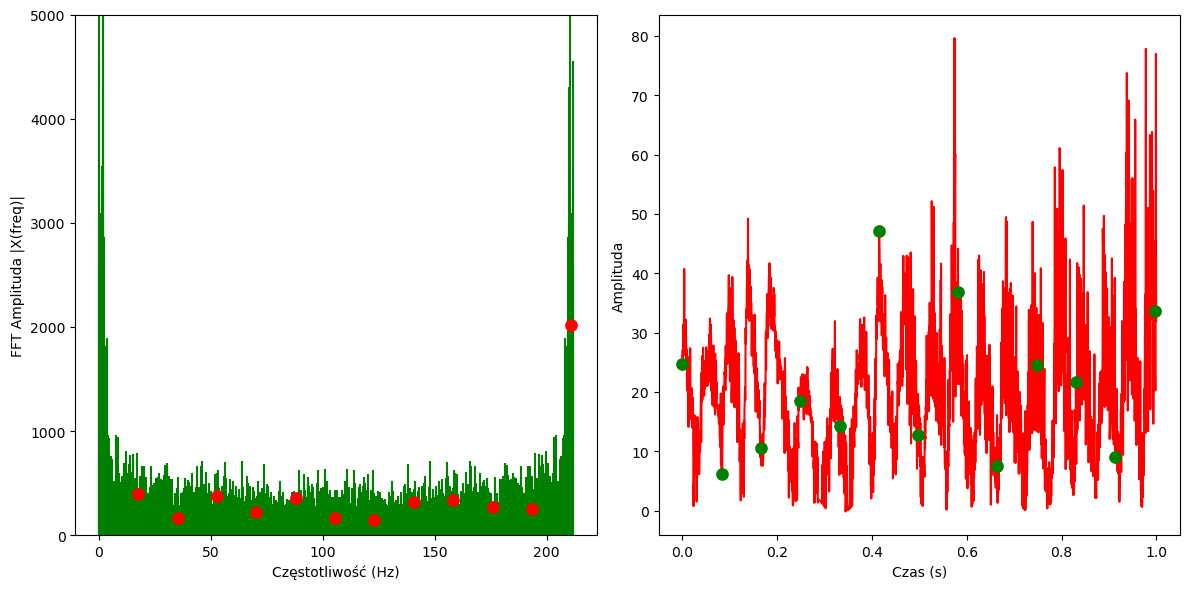

In [83]:
x = data_arr
sample_indices = np.arange(0, len(x), int(len(x)/12))  # 12 indeksow - 12 miesiecy

# Parametry sygnału
N = len(data_arr)
sr = N
ts = 1.0 / sr
t = np.arange(0, 1, ts)
n = np.arange(N)
T = 12
freq = n / T

# Rysowanie spektrum
plt.figure(figsize=(12, 6))
plt.subplot(121)
X = fft.fft(data_arr)
plt.stem(freq, np.abs(X), 'green', markerfmt=" ", basefmt="green")
plt.scatter(freq[sample_indices], np.abs(X[sample_indices]),
            color='red', marker='o', s=66, zorder=3)
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('FFT Amplituda |X(freq)|')
plt.ylim(0, 5000)

# Usunięcie składowej o częstotliwości 2 Hz
X[np.abs(freq) == 2] = 0

# Rysowanie sygnału w dziedzinie czasu po filtracji
plt.subplot(122)
filtered_signal = ifft(X)
plt.plot(t, filtered_signal, 'r')
plt.scatter(t[sample_indices], filtered_signal[sample_indices],
            color='green', marker='o', s=66, zorder=3)
plt.xlabel('Czas (s)')
plt.ylabel('Amplituda')
plt.tight_layout()
plt.show()

## Zadanie 3

#### Proste filtrowanie. Wykreśl sygnał sin(2*pi*t) + sin(4*pi*t), T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

C:\Users\miko2\anaconda3\envs\KCK\lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\miko2\anaconda3\envs\KCK\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


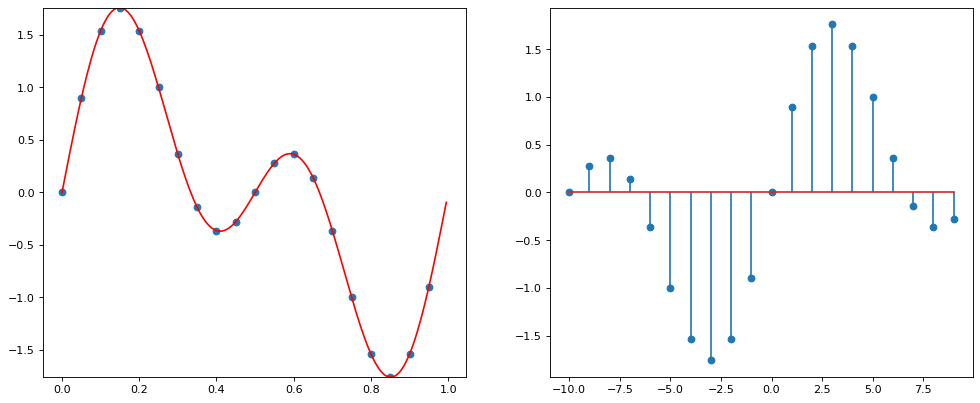

In [49]:
#--- Definiujemy sygnal wejsciowy
A = 1        # Amplituda sygnalu
F = 1.0      # Czestotliwosc sygnalu [Hz]
T = 1/F      # Okres sygnalu [s]
f = lambda t : np.sin(2*pi*t) + np.sin(4*pi*t)  # Def. analizowanej funkcji (sygnalu)

#--- Probkujemy sygnal
LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
w = 20       # Częstotliwość probkowania [Hz]
TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
n = len(t)                 # Liczba próbek

signal = f(t)

#--- Rysujemy sygnał (niebieskie kółka)
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_subplot(121)
ax.plot(t, signal, 'o')

#--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
base_t = np.arange(0, LP * T, 1/200)
base_signal = f(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])

#--- Wykonujemy FFT
signal1 = fft.fft(signal)
freqs = np.fft.fftfreq(len(signal1), 1/w)
signal1[np.abs(freqs) == 2] == 0

filtered_signal = ifft(signal1)
#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
#ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

# freqs = range(n)
stem(freqs, filtered_signal, '-*');

## Zadanie 4

#### Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości.

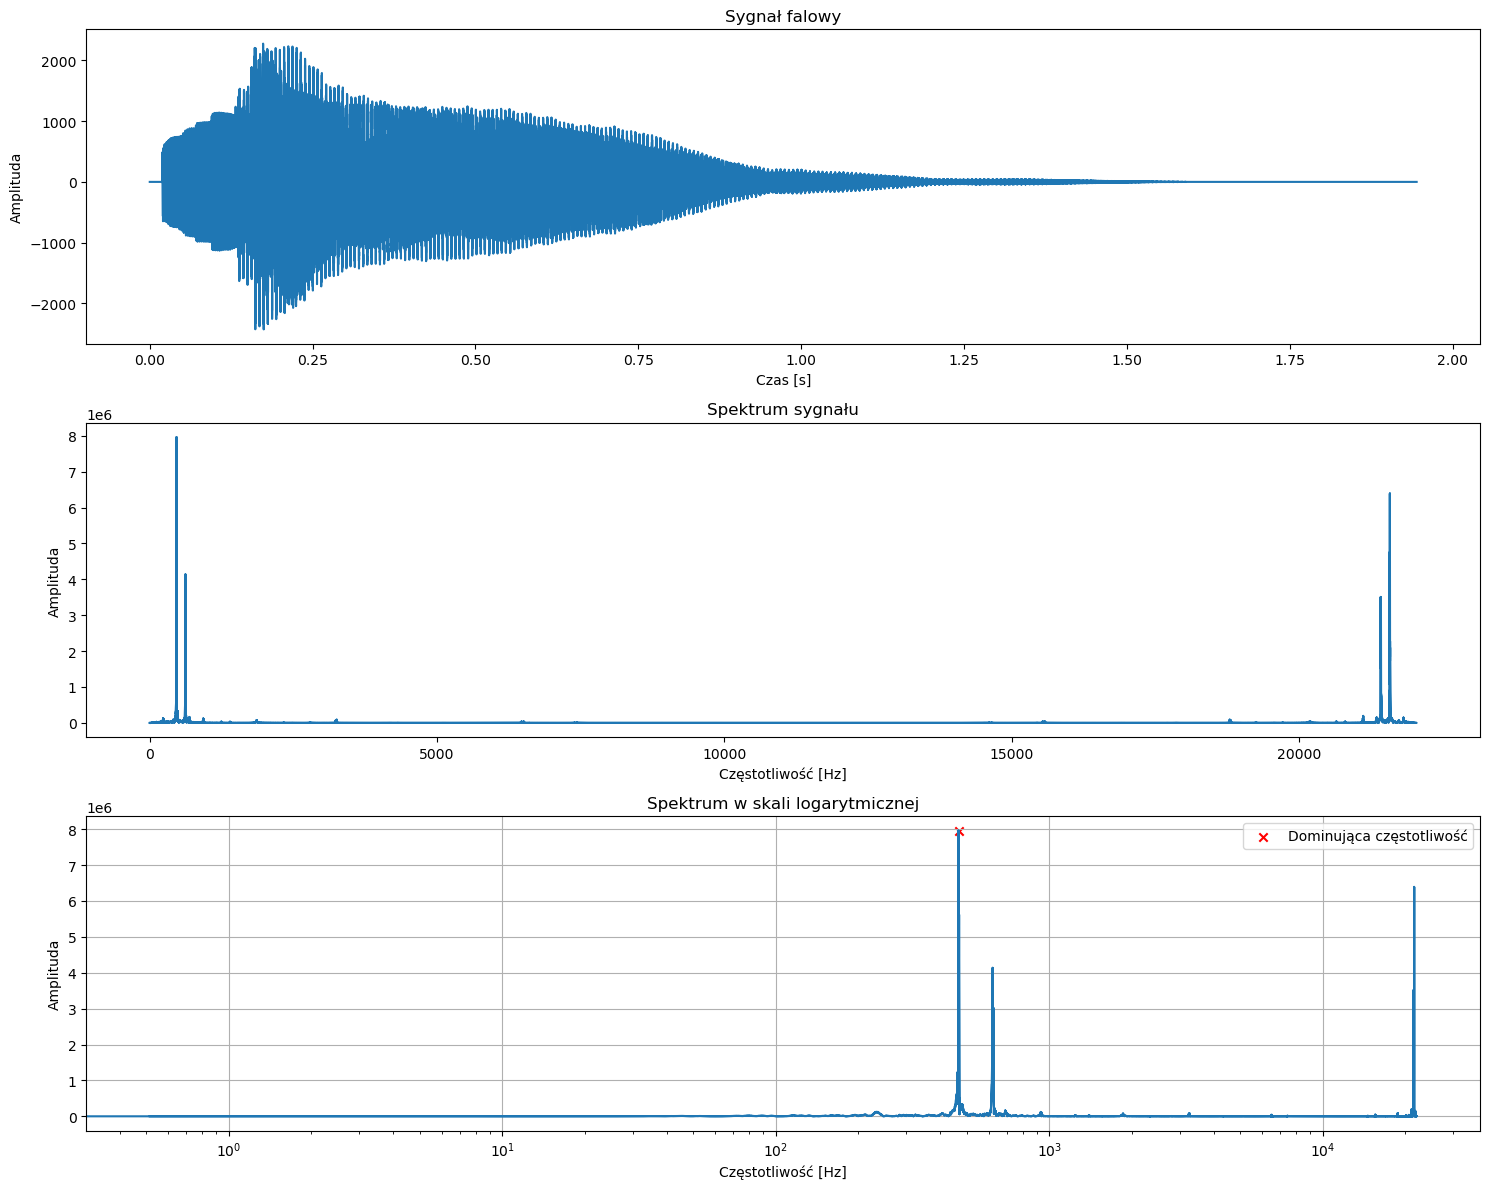

In [86]:
import wave
# Wczytanie pliku WAV
spf = wave.open('../data/lab3_data/lab_3a/err.wav', 'r')
signal = spf.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)

# Parametry pliku WAV
framerate = spf.getframerate()
t = np.arange(0, len(signal)) / framerate

# Wykreślenie sygnału w skali logarytmicznej
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.title('Sygnał falowy')
plt.plot(t, signal)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')

# Przeksztalcenie sygnału do dziedziny częstotliwości za pomocą FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/framerate)

# Wykreślenie spektrum w skali logarytmicznej
plt.subplot(3, 1, 3)
plt.title('Spektrum w skali logarytmicznej')
plt.semilogx(np.abs(frequencies), np.abs(fft_result))
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

# Znalezienie indeksu maksymalnej wartości amplitudy
dominant_frequency_index = np.argmax(np.abs(fft_result))

# Oznaczenie dominującej częstotliwości
plt.scatter(np.abs(frequencies[dominant_frequency_index]),
            np.abs(fft_result[dominant_frequency_index]),
            color='red', marker='x', label='Dominująca częstotliwość')
plt.legend()

# Wykreślenie spektrum w zwykłej skali
plt.subplot(3, 1, 2)
plt.title('Spektrum sygnału')
plt.plot(np.abs(frequencies), np.abs(fft_result))
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()

In [87]:
dominant_frequency = np.abs(frequencies[dominant_frequency_index])
print(f"Dominująca częstotliwość: {round(dominant_frequency)} Hz")

Dominująca częstotliwość: 466 Hz
